# __Analysis: Stars Data__
 This analysis explores a dataset containing information about different stars, including their physical properties like temperature, luminosity, radius, and magnitude. 

 The goal is to:
  * Understand the relationships between these characteristics 
  * Identify patterns among different star types and classifications. 
  * Clean the data, perform the analysis, and create visualizations to better understand stellar properties and their distributions.


## **1. Setting up the environment**

The following lines of code are used to import python libraries that are needed for the analysis.

In [2]:
# Import required libraries for data analysis and visualization:
# - pandas: data manipulation and analysis
# - numpy: numerical operations and calculations  
# - matplotlib: creating static visualizations
# - seaborn: statistical data visualization based on matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---

## **2. Exploratory Data Analysis**

This step involves reading the dataset, analysing the dataset to understand its structure, and its characteristics (e.g. Mean, Min, Max, etc.)
* #### **Check Dataset Information**
  The following code: Prints first 5 rows of the dataset, shows the structure of the dataset, including column types and missing data, and shows a summary of key statistics (mean, min, max, standard deviation, etc.) for numerical columns.

In [3]:
# Load the stars dataset from CSV file
stars_report = pd.read_csv('star_data.csv')
# Display first 5 rows to preview the data
stars_report.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3042,0.0005,0.1542,16.6,0.0,Red,M
2,2600,0.0003,0.102,18.7,0.0,Red,M
3,2800,0.0002,,16.65,0.0,Red,M
4,1939,0.000138,0.103,20.06,0.0,Red,M


In [4]:
# info() call that would show dataset metadata
stars_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         239 non-null    object 
 1   Luminosity(L/Lo)        239 non-null    object 
 2   Radius(R/Ro)            239 non-null    object 
 3   Absolute magnitude(Mv)  239 non-null    object 
 4   Star type               239 non-null    float64
 5   Star color              239 non-null    object 
 6   Spectral Class          239 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.3+ KB


* #### **Visualize Data Distributions**
Plot histograms or box plots to get an understanding of the distribution of values for each feature.

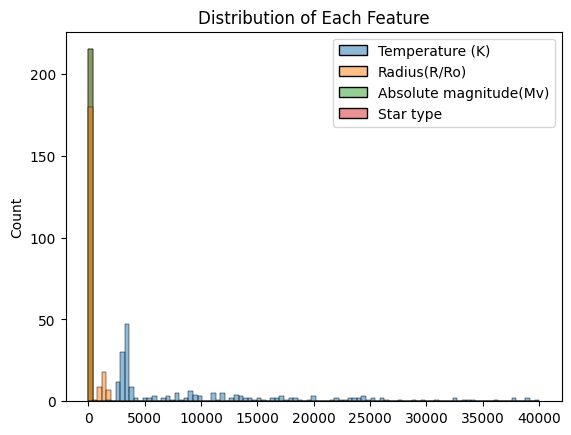

In [12]:
stars_report_2 = stars_report.drop('Luminosity(L/Lo)', axis=1)
plt.title('Distribution of Each Feature')
sns.histplot(stars_report_2, kde=False)
plt.show()

<Axes: xlabel='Luminosity(L/Lo)', ylabel='Count'>

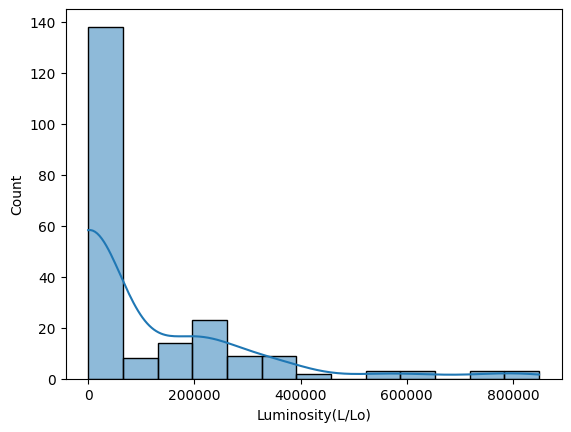

In [15]:
sns.histplot(stars_report['Luminosity(L/Lo)'], kde=True)

---

## **3. Data Cleaning and Preprocessing**
Data cleaning and preprocessing are essential steps to prepare the dataset for analysis. The following steps ensure data quality and consistency:

---
#### **Data Quality Checks**
  1. Identify and handle null values across all columns
  2. Detect and remove duplicate entries
---
#### **Data Standardization**
  3. Convert empty strings and whitespace to NaN values for consistency
  4. Remove incomplete records (rows with missing data)
  5. Set meaningful index name for better referencing
  6. Ensure proper data types by converting numeric columns to float
---
These steps help create a clean, standardized dataset ready for statistical analysis and visualization.

In [29]:
# Check for null values in each column
stars_report.isnull().sum()
stars_report.duplicated().sum()
# Replace empty strings with NaN values and remove rows with missing data
stars_report = stars_report.replace(' ', np.nan).dropna()
stars_report.index.name = 'Index'
# Display first 5 rows of cleaned dataset
stars_report.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Index,,,,,,,
0,3042.0,0.000500,0.1542,16.60,0.0,Red,M
1,2600.0,0.000300,0.1020,18.70,0.0,Red,M
2,1939.0,0.000138,0.1030,20.06,0.0,Red,M
3,2637.0,0.000730,0.1270,17.22,0.0,Red,M
4,2600.0,0.000400,0.0960,17.40,0.0,Red,M


In [7]:
# Convert numeric columns to float data type for analysis
stars_report[['Temperature (K)', 
             'Luminosity(L/Lo)',
             'Radius(R/Ro)',
             'Absolute magnitude(Mv)']] = stars_report[['Temperature (K)', 
                                                        'Luminosity(L/Lo)',
                                                        'Radius(R/Ro)',
                                                        'Absolute magnitude(Mv)']].astype(float)
stars_report.info()


<class 'pandas.core.frame.DataFrame'>
Index: 215 entries, 1 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         215 non-null    float64
 1   Luminosity(L/Lo)        215 non-null    float64
 2   Radius(R/Ro)            215 non-null    float64
 3   Absolute magnitude(Mv)  215 non-null    float64
 4   Star type               215 non-null    float64
 5   Star color              215 non-null    object 
 6   Spectral Class          215 non-null    object 
dtypes: float64(5), object(2)
memory usage: 13.4+ KB


---


### **4. Analysis and Visualization**
Once the dataset is cleaned, we can perform meaningful analysis and create insightful visualizations. 

---

* ## **Temperature-Luminosity Relationship Analysis**


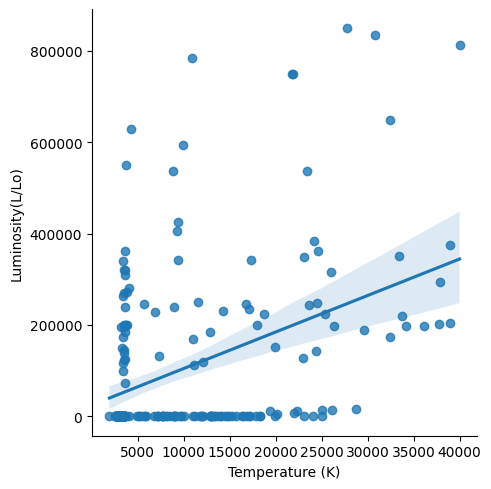

In [8]:
# Create a scatter plot with regression line showing relationship between 
# temperature and luminosity of stars
sns.lmplot(data = stars_report, x= 'Temperature (K)', y= 'Luminosity(L/Lo)')

---
 
### Overview

The scatter plot above shows the relationship between temperature and luminosity of stars in our dataset.
A clear positive correlation is visible - as temperature increases, luminosity tends to increase as well.
This aligns with the Stefan-Boltzmann law, which states that a star's luminosity is proportional to its 
temperature raised to the fourth power.

---

### Trend Analysis
The regression line (in blue) helps visualize this trend, though the relationship appears somewhat non-linear,
with more variance at higher temperatures. This pattern is typical of stellar populations, as stars of different
masses and evolutionary stages can have similar temperatures but varying luminosities.

---

### Distribution Characteristics  
Most stars in our dataset cluster in the lower temperature range (2000-6000K), typical of red dwarfs and 
main sequence stars, with relatively low luminosities. There are fewer stars at higher temperatures and
luminosities, which is expected as massive, hot stars are rarer in the universe.

---

* ## __Analysis of Stellar Radius vs. Absolute Magnitude Distribution__


Text(0.5, 1.0, 'Relationship between Stellar Radius and Absolute Magnitude')

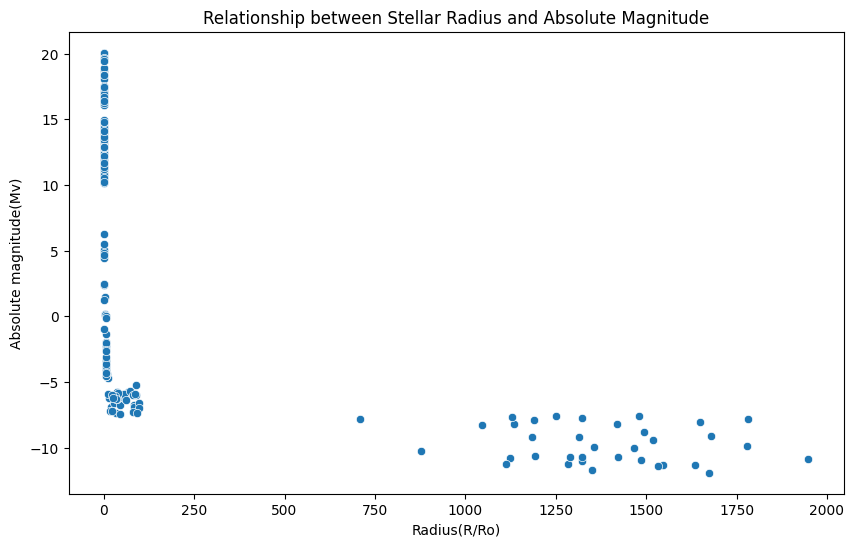

In [40]:
# Create scatter plot showing relationship between stellar radius and absolute magnitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data = stars_report, x= 'Radius(R/Ro)', y= 'Absolute magnitude(Mv)')
plt.title('Relationship between Stellar Radius and Absolute Magnitude')

---

### Distribution Pattern
The scatter plot reveals a distinct bimodal distribution with two primary star clusters:

1. **Small-Radius Cluster**
   - Radius: R < 250 R/Ro (solar radii)
   - Absolute Magnitude Range: -5 to 20
   - Dense concentration of stars
   
2. **Large-Radius Cluster**
   - Radius: R > 750 R/Ro
   - Absolute Magnitude Range: -10 to -7
   - More dispersed distribution
   ---

### Physical Interpretation
- The small-radius cluster likely comprises main sequence stars and white dwarfs
- The large-radius cluster represents giant and supergiant stars
- A notable gap between clusters (250-750 R/Ro) indicates the rapid stellar evolution transition phase

  ---
### Key Observations
1. **Inverse Relationship**: Larger radius correlates with lower absolute magnitude (higher luminosity)
2. **Size Distribution**: 
   - Majority of stars have small radii (clustered near y-axis)
   - Maximum radius observed: ~2000 R/Ro
3. **Brightness Patterns**:
   - Larger stars tend to be brighter (lower absolute magnitude)
   - Small-radius stars show greater variation in absolute magnitude
---

* ## **Distribution of Star Types**


The histogram above shows the frequency distribution of different stellar classifications in our dataset:
 - Brown Dwarfs (0)
 - Red Dwarfs (1) 
 - White Dwarfs (2)
 - Main Sequence Stars (3)
 - Supergiants (4)
 - Hypergiants (5)

([<matplotlib.axis.YTick at 0x1856b904950>,
 [Text(0, 0, 'Brown Dwarf'),
  Text(0, 1, 'Red Dwarf'),
  Text(0, 2, 'White Dwarf'),
  Text(0, 3, 'Main Sequence'),
  Text(0, 4, 'Supergiants'),
  Text(0, 5, 'Hypergiants')])

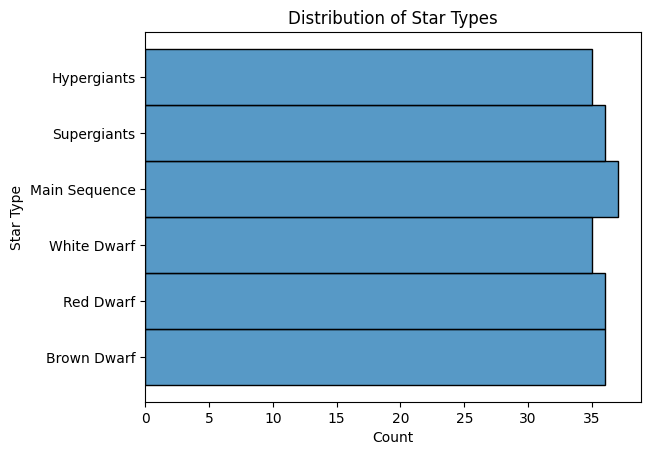

In [43]:
# Create a histogram showing the distribution of different star types in the dataset
sns.histplot(data=stars_report, y='Star type', bins=6, discrete=True)
# Label the y-axis
plt.ylabel('Star Type')
# Label the x-axis
plt.xlabel('Count')
# Add a title to the plot
plt.title('Distribution of Star Types')
# Set custom labels for each star type category (0-5)
plt.yticks([0,1,2,3,4,5], ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 
                           'Main Sequence', 'Supergiants', 'Hypergiants'])

* ## **Correlation Analysis of Star Properties**


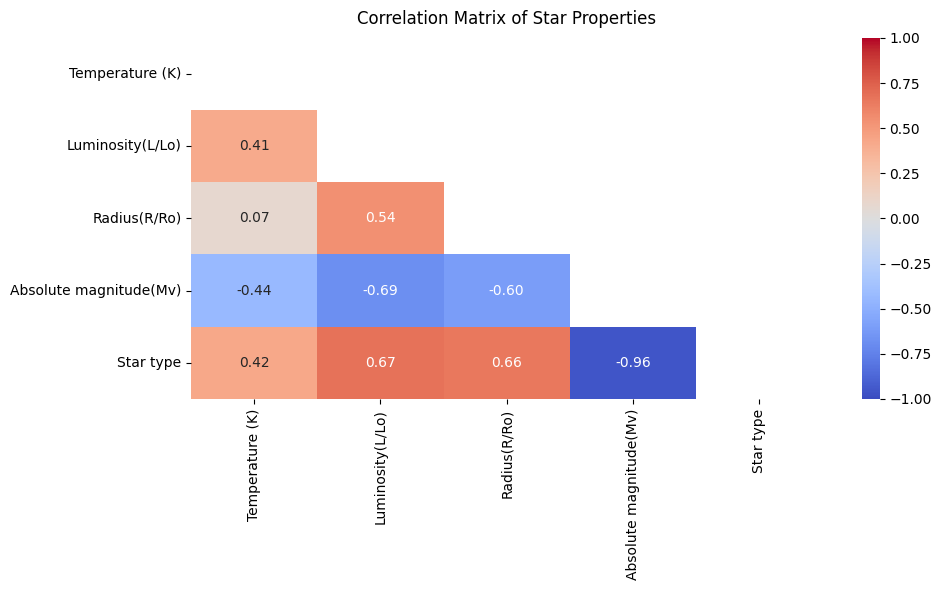

In [11]:
# Compute correlations
# Calculate correlation matrix for key star properties
correlation = stars_report[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 
                          'Absolute magnitude(Mv)', 'Star type']].corr()

# Create mask for upper triangle to avoid redundant display
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Create correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, 
            mask=mask,
            annot=True, 
            cmap='coolwarm',
            fmt='.2f',
            vmin=-1, vmax=1,
            center=0)

plt.title('Correlation Matrix of Star Properties', pad=10)
plt.tight_layout()
plt.show()


### **Analysis of Star Properties Correlation Matrix**

### Strongest Correlations
- **Star type and Absolute magnitude** (-0.96)
  - Very strong negative correlation
  - As star type number increases, absolute magnitude strongly decreases (stars become brighter)
  - This is one of the strongest relationships in the dataset

### Moderate to Strong Correlations
- **Luminosity and Star type** (0.67)
  - Higher luminosity stars tend to be classified as higher star types
- **Radius and Star type** (0.66)
  - Larger stars tend to be classified as higher star types
- **Luminosity and Radius** (0.54)
  - Larger stars tend to be more luminous
- **Absolute magnitude and Luminosity** (-0.69)
  - As luminosity increases, absolute magnitude decreases (stars become brighter)
- **Absolute magnitude and Radius** (-0.60)
  - Larger stars tend to be brighter (lower absolute magnitude)

### Weaker Correlations
- **Temperature and Luminosity** (0.41)
  - Hotter stars tend to be somewhat more luminous
- **Temperature and Star type** (0.42)
  - Hotter stars tend to be classified as higher star types
- **Temperature and Radius** (0.07)
  - Almost no direct relationship between temperature and radius
- **Temperature and Absolute magnitude** (-0.44)
  - Hotter stars tend to be somewhat brighter

## Key Insights
1. The strongest relationships involve Star type and Absolute magnitude
2. Luminosity, Radius, and Temperature form an interconnected group of properties
3. Temperature shows surprisingly weak correlation with Radius
4. Most correlations are moderate to strong, suggesting these properties are highly interdependent

## Physical Implications
- The correlations align with stellar evolution theory
- The strong relationship between star type and absolute magnitude suggests classification is heavily based on brightness
- The weak temperature-radius correlation suggests these properties vary independently across different types of stars